In [162]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [163]:
df=pd.read_csv("election survey 2_csv.csv")

In [164]:
df.head()

,Gender:\n,Age:\n,Educational Qualification:\n,Occupation:\n,religion \n,Area/locality\n,monthly household income \n,Will you vote in upcoming elections?\n,traditionaly supported\n,party/alliance currently in a stronger position ? \n,"If Lok Sabha elections are held tomorrow ,which party will you vote for? \n",most important election issue for you?,issues vs person?,"Voting Priorities?""","MP Satisfaction?""","""MP Performance Rating?""\n\n\n\n",current Govt. Satisfaction?,re_elect govt?
0,male,21 to 30,Postgraduate,Student,Hindu,Urban/Big city,Over Rs. 50001,Yes,party from National Democratic Alliance (ND),BJP,party from National Democratic Alliance (ND),Can't Say,Election issues,The performance the political party,No,Good,Yes,Yes
1,male,21 to 30,Graduate,Student,Hindu,Urban/Big city,Over Rs. 50001,Yes,Congress,BJP,Congress,Price rise /inflation,political leader's face/personality,The performance of the candidate/MP.,No,Poor,Yes,Yes
2,Female,46 to 60,Secondary School/Matric,Self-employed,Christian,Urban/Small city,"Rs. 20,000 to Rs. 50,000",Yes,party from National Democratic Alliance (ND),Indian National Developmental Inclusive Allian...,party from Indian National Developmental Inclu...,Unemployment,Election issues,The performance of the Prime Minister,No Response,Good,Yes,No
3,Female,61 to 75,Non-Literate,Farmer,Islam,Rural/Village,"Rs. 10,001 - Rs. 20,000",Yes,party from National Democratic Alliance (ND),BJP,party from National Democratic Alliance (ND),Farmer distress,political leader's face/personality,The performance of the candidate/MP.,No,Very poor,No,No
4,Female,21 to 30,Postgraduate,Employed (Govt.),No Response,Urban/Big city,"Rs. 20,000 to Rs. 50,000",No,BJP,BJP,BJP,Unemployment,No Response,The performance of the Prime Minister,Yes,Good,Yes,Yes


In [165]:
df.shape[0]

383

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 18 columns):
 #   Column                                                                       Non-Null Count  Dtype 
---  ------                                                                       --------------  ----- 
 0   Gender:
                                                                     383 non-null    object
 1    Age:
                                                                       383 non-null    object
 2    Educational Qualification:
                                                 383 non-null    object
 3    Occupation:
                                                                383 non-null    object
 4   religion 
                                                                   383 non-null    object
 5   Area/locality
                                                               374 non-null    object
 6    monthly household income 
                       

In [167]:
df.isnull().sum()

Gender:\n                                                                       0
 Age:\n                                                                         0
 Educational Qualification:\n                                                   0
 Occupation:\n                                                                  0
religion \n                                                                     0
Area/locality\n                                                                 9
 monthly household income \n                                                    0
 Will you vote in upcoming elections?\n                                         0
traditionaly supported\n                                                        0
party/alliance currently in a stronger position ? \n                            0
 If Lok Sabha elections are held tomorrow ,which party will you vote for? \n    0
 most important election issue for you?                                         0
issues vs person

**ENCODING**

In [168]:
##GENDER ENCODING

df = pd.get_dummies(df, columns=['Gender:\n'], prefix='Gender:\n', drop_first=True)


In [169]:
df['Gender:\n_male'] = df['Gender:\n_male'].astype(int)


In [170]:
print(df.columns)


Index([' Age:\n', ' Educational Qualification:\n', ' Occupation:\n',
       'religion \n', 'Area/locality\n', ' monthly household income \n',
       ' Will you vote in upcoming elections?\n', 'traditionaly supported\n',
       'party/alliance currently in a stronger position ? \n',
       ' If Lok Sabha elections are held tomorrow ,which party will you vote for? \n',
       ' most important election issue for you?', 'issues vs person?',
       'Voting Priorities?"', 'MP Satisfaction?"',
       '"MP Performance Rating?"\n\n\n\n', 'current Govt. Satisfaction?',
       're_elect govt?', 'Gender:\n_male'],
      dtype='object')


In [171]:
##age encoding

age_mapping = {
    '21 to 30': 1,
    '31 to 45': 2,
    '46 to 60': 3,
    '61 to 75': 4,
    '75 and above': 5
}

df['Age'] = df[' Age:\n'].map(age_mapping)


In [172]:
df.drop(columns=[' Age:\n'], inplace=True)


In [173]:
##education encoding

df[' Educational Qualification:\n'].unique()

array(['Postgraduate', 'Graduate', 'Secondary School/Matric',
       'Non-Literate', 'Higher Secondary/Intermediate', 'Primary School'],
      dtype=object)

In [174]:

education_mapping = {
    'Non-Literate': 0,
    'Primary School': 1,
    'Secondary School/Matric': 2,
    'Higher Secondary/Intermediate': 3,
    'Graduate': 4,
    'Postgraduate': 5
}

# Map the educational qualifications to numerical values
df['Educational Qualification'] = df[' Educational Qualification:\n'].map(education_mapping)



In [175]:
df.drop(columns=[' Educational Qualification:\n'], inplace=True)


In [176]:
##occupation encoding

df[' Occupation:\n'].unique()

array(['Student', 'Self-employed', 'Farmer', 'Employed (Govt.)', 'Other',
       'Homemaker', 'Retired', 'Unemployed'], dtype=object)

In [177]:
df = pd.get_dummies(df, columns=[' Occupation:\n'], prefix=' Occupation:\n')


In [178]:
columns_to_convert = [' Occupation:\n_Employed (Govt.)', ' Occupation:\n_Farmer',
       ' Occupation:\n_Homemaker', ' Occupation:\n_Other',
       ' Occupation:\n_Retired', ' Occupation:\n_Self-employed',
       ' Occupation:\n_Student', ' Occupation:\n_Unemployed']

df[columns_to_convert] = df[columns_to_convert].replace({True: 1, False: 0})


C:\Users\admin\AppData\Local\Temp\ipykernel_7304\3193151044.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_convert] = df[columns_to_convert].replace({True: 1, False: 0})


In [179]:
df.rename(columns={'religion \n': 'Religion'}, inplace=True)


In [180]:
df = pd.get_dummies(df, columns=['Religion'], prefix='Religion')


In [181]:
df['Religion_No Response'].sum()

10

In [182]:
df = df[df['Religion_No Response'] == False]


In [183]:
df.drop(columns=['Religion_No Response'],inplace=True)

In [184]:
df.head()

,Area/locality\n,monthly household income \n,Will you vote in upcoming elections?\n,traditionaly supported\n,party/alliance currently in a stronger position ? \n,"If Lok Sabha elections are held tomorrow ,which party will you vote for? \n",most important election issue for you?,issues vs person?,"Voting Priorities?""","MP Satisfaction?""",...,Occupation:\n_Other,Occupation:\n_Retired,Occupation:\n_Self-employed,Occupation:\n_Student,Occupation:\n_Unemployed,Religion_Buddhist,Religion_Christian,Religion_Hindu,Religion_Islam,Religion_Other
0,Urban/Big city,Over Rs. 50001,Yes,party from National Democratic Alliance (ND),BJP,party from National Democratic Alliance (ND),Can't Say,Election issues,The performance the political party,No,...,0,0,0,1,0,False,False,True,False,False
1,Urban/Big city,Over Rs. 50001,Yes,Congress,BJP,Congress,Price rise /inflation,political leader's face/personality,The performance of the candidate/MP.,No,...,0,0,0,1,0,False,False,True,False,False
2,Urban/Small city,"Rs. 20,000 to Rs. 50,000",Yes,party from National Democratic Alliance (ND),Indian National Developmental Inclusive Allian...,party from Indian National Developmental Inclu...,Unemployment,Election issues,The performance of the Prime Minister,No Response,...,0,0,1,0,0,False,True,False,False,False
3,Rural/Village,"Rs. 10,001 - Rs. 20,000",Yes,party from National Democratic Alliance (ND),BJP,party from National Democratic Alliance (ND),Farmer distress,political leader's face/personality,The performance of the candidate/MP.,No,...,0,0,0,0,0,False,False,False,True,False
5,Urban/Small city,"Rs. 20,000 to Rs. 50,000",Yes,party from National Democratic Alliance (ND),BJP,Aam Aadmi Party,"Discrimination against women, Crimes against w...",Other,The performance of the candidate/MP.,Yes,...,0,0,0,1,0,True,False,False,False,False


In [185]:
df['Area/locality\n'].isna().sum()


9

In [186]:
df.dropna(subset=['Area/locality\n'], inplace=True)


In [187]:
df.rename(columns={'Area/locality\n': 'Locality'}, inplace=True)


In [188]:
df = pd.get_dummies(df, columns=['Locality'], prefix='Locality')


In [189]:
df.columns

Index([' monthly household income \n',
       ' Will you vote in upcoming elections?\n', 'traditionaly supported\n',
       'party/alliance currently in a stronger position ? \n',
       ' If Lok Sabha elections are held tomorrow ,which party will you vote for? \n',
       ' most important election issue for you?', 'issues vs person?',
       'Voting Priorities?"', 'MP Satisfaction?"',
       '"MP Performance Rating?"\n\n\n\n', 'current Govt. Satisfaction?',
       're_elect govt?', 'Gender:\n_male', 'Age', 'Educational Qualification',
       ' Occupation:\n_Employed (Govt.)', ' Occupation:\n_Farmer',
       ' Occupation:\n_Homemaker', ' Occupation:\n_Other',
       ' Occupation:\n_Retired', ' Occupation:\n_Self-employed',
       ' Occupation:\n_Student', ' Occupation:\n_Unemployed',
       'Religion_Buddhist', 'Religion_Christian', 'Religion_Hindu',
       'Religion_Islam', 'Religion_Other', 'Locality_Rural/Village',
       'Locality_Urban/Big city', 'Locality_Urban/Small city'],
    

In [190]:
columns_to_convert = ['Religion_Buddhist', 'Religion_Christian', 'Religion_Hindu',
       'Religion_Islam', 'Religion_Other',
       'Locality_Rural/Village', 'Locality_Urban/Big city',
       'Locality_Urban/Small city']

df[columns_to_convert] = df[columns_to_convert].replace({True: 1, False: 0})

C:\Users\admin\AppData\Local\Temp\ipykernel_7304\871887075.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns_to_convert] = df[columns_to_convert].replace({True: 1, False: 0})


In [191]:
##encoding mothly income
df.rename(columns={' monthly household income \n': 'Monthly Income'}, inplace=True)




In [192]:
from sklearn.preprocessing import OrdinalEncoder

# Define the order of categories based on their ordinal relationship
income_order = ['Over Rs. 50001', 'Rs. 20,000 to Rs. 50,000',
       'Rs. 10,001 - Rs. 20,000', 'Up to Rs.10,000']

# Initialize OrdinalEncoder with specified order
ordinal_encoder = OrdinalEncoder(categories=[income_order])

# Apply ordinal encoding to the 'monthly household income' column
df['Income'] = ordinal_encoder.fit_transform(df[['Monthly Income']])



In [193]:
df.drop(columns=['Monthly Income'],inplace=True)

In [194]:
df.head()

,Will you vote in upcoming elections?\n,traditionaly supported\n,party/alliance currently in a stronger position ? \n,"If Lok Sabha elections are held tomorrow ,which party will you vote for? \n",most important election issue for you?,issues vs person?,"Voting Priorities?""","MP Satisfaction?""","""MP Performance Rating?""\n\n\n\n",current Govt. Satisfaction?,...,Occupation:\n_Unemployed,Religion_Buddhist,Religion_Christian,Religion_Hindu,Religion_Islam,Religion_Other,Locality_Rural/Village,Locality_Urban/Big city,Locality_Urban/Small city,Income
0,Yes,party from National Democratic Alliance (ND),BJP,party from National Democratic Alliance (ND),Can't Say,Election issues,The performance the political party,No,Good,Yes,...,0,0,0,1,0,0,0,1,0,0.0
1,Yes,Congress,BJP,Congress,Price rise /inflation,political leader's face/personality,The performance of the candidate/MP.,No,Poor,Yes,...,0,0,0,1,0,0,0,1,0,0.0
2,Yes,party from National Democratic Alliance (ND),Indian National Developmental Inclusive Allian...,party from Indian National Developmental Inclu...,Unemployment,Election issues,The performance of the Prime Minister,No Response,Good,Yes,...,0,0,1,0,0,0,0,0,1,1.0
3,Yes,party from National Democratic Alliance (ND),BJP,party from National Democratic Alliance (ND),Farmer distress,political leader's face/personality,The performance of the candidate/MP.,No,Very poor,No,...,0,0,0,0,1,0,1,0,0,2.0
5,Yes,party from National Democratic Alliance (ND),BJP,Aam Aadmi Party,"Discrimination against women, Crimes against w...",Other,The performance of the candidate/MP.,Yes,Good,Yes,...,0,1,0,0,0,0,0,0,1,1.0


In [195]:
df['will vote']=df[' Will you vote in upcoming elections?\n']

In [196]:
df.drop(columns=[' Will you vote in upcoming elections?\n'],inplace=True)

In [197]:
df['will vote'] = df['will vote'].replace({'Yes': 1, 'No': 0})


C:\Users\admin\AppData\Local\Temp\ipykernel_7304\1128469734.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['will vote'] = df['will vote'].replace({'Yes': 1, 'No': 0})


In [198]:
###

In [199]:
df.columns=['trad_supp',
       'current_strong_pos',
       'your_vote_for',
       'imp_issue', 'issues vs personality?',
       'Voting Priorities', 'MP Satisfaction?',
       'MP Performance Rating', 'current Govt. Satisfaction',
       're_elect govt', 'Gender_male', 'Age', 'Educational Qualification',
       ' Occupation_Employed (Govt.)', ' Occupation_Farmer',
       ' Occupation_Homemaker', ' Occupation_Other',
       ' Occupation_Retired', ' Occupation_Self-employed',
       ' Occupation_Student', ' Occupation_Unemployed','Religion_Buddhist', 'Religion_Christian', 'Religion_Hindu',
       'Religion_Islam', 'Religion_Other', 'Locality_Rural/Village',
       'Locality_Urban/Big city', 'Locality_Urban/Small city', 'Income',
       'will vote']

In [200]:
df.columns

Index(['trad_supp', 'current_strong_pos', 'your_vote_for', 'imp_issue',
       'issues vs personality?', 'Voting Priorities', 'MP Satisfaction?',
       'MP Performance Rating', 'current Govt. Satisfaction', 're_elect govt',
       'Gender_male', 'Age', 'Educational Qualification',
       ' Occupation_Employed (Govt.)', ' Occupation_Farmer',
       ' Occupation_Homemaker', ' Occupation_Other', ' Occupation_Retired',
       ' Occupation_Self-employed', ' Occupation_Student',
       ' Occupation_Unemployed', 'Religion_Buddhist', 'Religion_Christian',
       'Religion_Hindu', 'Religion_Islam', 'Religion_Other',
       'Locality_Rural/Village', 'Locality_Urban/Big city',
       'Locality_Urban/Small city', 'Income', 'will vote'],
      dtype='object')

In [201]:
df.shape[0]

364

In [202]:
##traditionally supported encoding
df['trad_supp'].unique()

array(['party from National Democratic Alliance (ND)', 'Congress',
       'party from Indian National Developmental Inclusive Alliance (INDIA)',
       'BJP', 'Aam Aadmi Party', 'No party'], dtype=object)

In [203]:
df=df[df['trad_supp'] != 'No party']


In [204]:
df=pd.get_dummies(df,columns=['trad_supp'])

In [205]:
map={
    'trad_supp_Aam Aadmi Party':'trad_AAP',
    'trad_supp_BJP':'trad_BJP'	,
    'trad_supp_Congress':'trad_congress',
    'trad_supp_party from Indian National Developmental Inclusive Alliance (INDIA)':'trad_india',
    'trad_supp_party from National Democratic Alliance (ND)':'trad_nda'
}

df=df.rename(columns=map)

In [206]:
##curent strong
df['current_strong_pos'].unique()

array(['BJP', 'Indian National Developmental Inclusive Alliance (INDIA)',
       'National Democratic Alliance (NDA)', 'Aam Aadmi Party',
       'Congress'], dtype=object)

In [207]:
df=pd.get_dummies(df,columns=['current_strong_pos'])

In [208]:
map2={
    'current_strong_pos_Aam Aadmi Party':'strg_aap',
    'current_strong_pos_BJP':'strg_bjp',
    'current_strong_pos_Congress':'strg_congress',
    'current_strong_pos_Indian National Developmental Inclusive Alliance (INDIA)':'strg_india',
    'current_strong_pos_National Democratic Alliance (NDA)':'strg_nda'
}

df=df.rename(columns=map2)

In [209]:
##your vote encoding
df['your_vote_for'].unique()

array(['party from National Democratic Alliance (ND)', 'Congress',
       'party from Indian National Developmental Inclusive Alliance (INDIA)',
       'Aam Aadmi Party', 'BJP'], dtype=object)

In [210]:
df=pd.get_dummies(df,columns=['your_vote_for'])



In [211]:
map3={
    'your_vote_for_Aam Aadmi Party':'vote_aap',
    'your_vote_for_BJP':'vote_bjp',
    'your_vote_for_Congress':'vote_congress',
    'your_vote_for_party from Indian National Developmental Inclusive Alliance (INDIA)':'vote_india',
    'your_vote_for_party from National Democratic Alliance (ND)':'vote_nda'

}

df=df.rename(columns=map3)

In [212]:
##isuues vs personality encoding
df['issues vs personality?'].unique()

array(['Election issues', "political leader's face/personality", 'Other'],
      dtype=object)

In [213]:
df=pd.get_dummies(df,columns=['issues vs personality?'])


In [214]:
map4={
    'issues vs personality?_Election issues':'electn_isuues',
    'issues vs personality?_Other':'other',
    "issues vs personality?_political leader's face/personality":"leader"

}

df=df.rename(columns=map4)

In [215]:
##encoding mps satisfaction
df['MP Satisfaction?'].unique()


array(['No', 'No Response', 'Yes'], dtype=object)

In [216]:
m = len(df[df['MP Satisfaction?'] == 'No Response'])
m

28

In [217]:
most_frequent_value = df['MP Satisfaction?'].mode()[0]
entry_to_replace = 'No Response'
df.loc[df['MP Satisfaction?'] == entry_to_replace, 'MP Satisfaction?'] = most_frequent_value

In [218]:
df['MP Satisfaction?'] = df['MP Satisfaction?'].replace({'Yes': 1, 'No': 0})


C:\Users\admin\AppData\Local\Temp\ipykernel_7304\2652121640.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['MP Satisfaction?'] = df['MP Satisfaction?'].replace({'Yes': 1, 'No': 0})


In [219]:
##encoding 'MP Performance Rating'
df['MP Performance Rating'].unique()

array(['Good', 'Poor', 'Very poor', 'No Response', 'Satisfactory',
       'Excellent'], dtype=object)

In [220]:
m = len(df[df['MP Performance Rating'] == 'No Response'])
m

23

In [221]:
most_frequent_value = df['MP Performance Rating'].mode()[0]
entry_to_replace = 'No Response'
df.loc[df['MP Performance Rating'] == entry_to_replace, 'MP Performance Rating'] = most_frequent_value


In [222]:
ordinal_mapping = {
    'Very poor': 1,
    'Poor': 2,
    'Satisfactory': 3,
    'Good': 4,
    'Excellent': 5
}

df['MP Performance Rating'] = df['MP Performance Rating'].map(ordinal_mapping)


In [223]:
df.head()

,imp_issue,Voting Priorities,MP Satisfaction?,MP Performance Rating,current Govt. Satisfaction,re_elect govt,Gender_male,Age,Educational Qualification,Occupation_Employed (Govt.),...,strg_india,strg_nda,vote_aap,vote_bjp,vote_congress,vote_india,vote_nda,electn_isuues,other,leader
0,Can't Say,The performance the political party,0,4,Yes,Yes,1,1.0,5,0,...,False,False,False,False,False,False,True,True,False,False
1,Price rise /inflation,The performance of the candidate/MP.,0,2,Yes,Yes,1,1.0,4,0,...,False,False,False,False,True,False,False,False,False,True
2,Unemployment,The performance of the Prime Minister,0,4,Yes,No,0,3.0,2,0,...,True,False,False,False,False,True,False,True,False,False
3,Farmer distress,The performance of the candidate/MP.,0,1,No,No,0,4.0,0,0,...,False,False,False,False,False,False,True,False,False,True
5,"Discrimination against women, Crimes against w...",The performance of the candidate/MP.,1,4,Yes,Yes,1,NaN,2,0,...,False,False,True,False,False,False,False,False,True,False


In [224]:
##encoding current gov
df['current Govt. Satisfaction'].unique()

array(['Yes', 'No'], dtype=object)

In [225]:
df['current Govt. Satisfaction'] = df['current Govt. Satisfaction'].replace({'Yes': 1, 'No': 0})


C:\Users\admin\AppData\Local\Temp\ipykernel_7304\741608000.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['current Govt. Satisfaction'] = df['current Govt. Satisfaction'].replace({'Yes': 1, 'No': 0})


In [226]:
##encoding reelct govt
df['re_elect govt'].unique()

array(['Yes', 'No'], dtype=object)

In [227]:
df['re_elect govt'] = df['re_elect govt'].replace({'Yes': 1, 'No': 0})


C:\Users\admin\AppData\Local\Temp\ipykernel_7304\3062950203.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['re_elect govt'] = df['re_elect govt'].replace({'Yes': 1, 'No': 0})


In [228]:
df = df.replace({True: 1, False: 0})


C:\Users\admin\AppData\Local\Temp\ipykernel_7304\2180546242.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


df is main file, now creating new  [dr2], dataset w/o 2 column (categorical)

In [229]:
df2=df.drop(columns=['imp_issue','Voting Priorities'])
df2.head()

,MP Satisfaction?,MP Performance Rating,current Govt. Satisfaction,re_elect govt,Gender_male,Age,Educational Qualification,Occupation_Employed (Govt.),Occupation_Farmer,Occupation_Homemaker,...,strg_india,strg_nda,vote_aap,vote_bjp,vote_congress,vote_india,vote_nda,electn_isuues,other,leader
0,0,4,1,1,1,1.0,5,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,2,1,1,1,1.0,4,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,4,1,0,0,3.0,2,0,0,0,...,1,0,0,0,0,1,0,1,0,0
3,0,1,0,0,0,4.0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
5,1,4,1,1,1,NaN,2,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [230]:
df2.isnull().sum()

MP Satisfaction?                 0
MP Performance Rating            0
current Govt. Satisfaction       0
re_elect govt                    0
Gender_male                      0
Age                             42
Educational Qualification        0
 Occupation_Employed (Govt.)     0
 Occupation_Farmer               0
 Occupation_Homemaker            0
 Occupation_Other                0
 Occupation_Retired              0
 Occupation_Self-employed        0
 Occupation_Student              0
 Occupation_Unemployed           0
Religion_Buddhist                0
Religion_Christian               0
Religion_Hindu                   0
Religion_Islam                   0
Religion_Other                   0
Locality_Rural/Village           0
Locality_Urban/Big city          0
Locality_Urban/Small city        0
Income                           0
will vote                        0
trad_AAP                         0
trad_BJP                         0
trad_congress                    0
trad_india          

In [231]:
column_mode = df2['Age'].mode()[0]

In [232]:
df2['Age'].fillna(column_mode, inplace=True)
#now no null values

C:\Users\admin\AppData\Local\Temp\ipykernel_7304\2880018427.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Age'].fillna(column_mode, inplace=True)


**EDA**

In [233]:
import seaborn as sns
import matplotlib.pyplot as plt


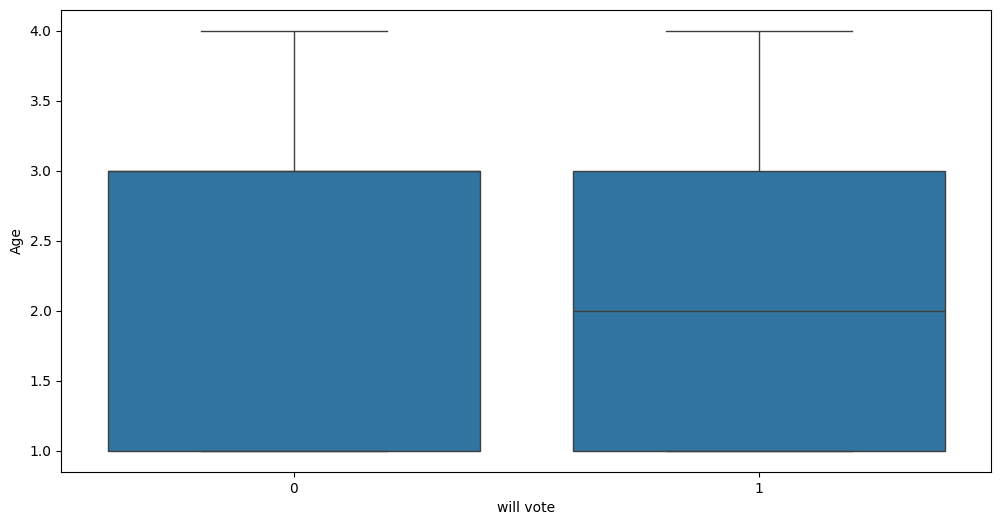

In [234]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='will vote', y='Age', data=df2)
plt.show()

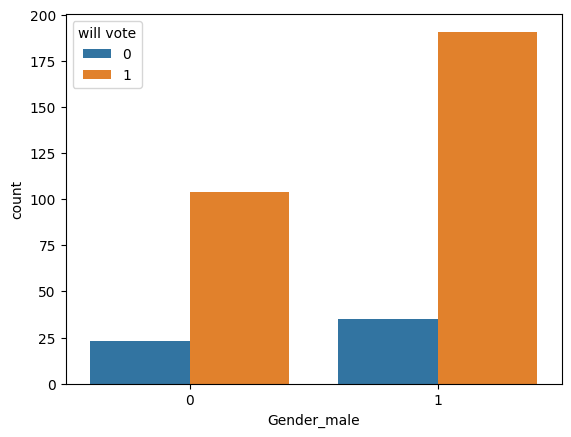

In [235]:
sns.countplot(x='Gender_male', data=df2, hue='will vote')
plt.show()

splitting the data

In [236]:
X = df2.drop(columns=['re_elect govt'])
y = df2['re_elect govt']

In [237]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


RANDOM **FOREST**

In [238]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [239]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[21  0]
 [ 0 50]]


**LOGISTIC**

In [240]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
##logistic
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        50

    accuracy                           1.00        71
   macro avg       1.00      1.00      1.00        71
weighted avg       1.00      1.00      1.00        71



cross validation

In [241]:
from sklearn.model_selection import cross_val_score

# cv=5 means 5-fold cross-validation
# scoring='accuracy' specifies the metric to be used for evaluation
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculate and print the mean and standard deviation of the scores
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())

Cross-Validation Scores: [1.         0.97183099 1.         0.94285714 1.        ]
Mean Accuracy: 0.9829376257545273
Standard Deviation: 0.022817433696536788
